In [1]:
import os
os.chdir("..")

In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [3]:
# # size = "243_2"
# # size = "128_0"
# # size = "473_6"
# # df = pd.read_csv(f"{size}.csv")
df = pd.read_csv(f"record_0.csv")
# # df = pd.read_csv(f"results/{size}.csv")
df

,epoch,step,train_loss,val_loss,train_acc,val_acc,test_acc,past_task_test_acc
0,0,0,0.000000,2.309574,0.000000,0.000000,0.000000,0.000000
1,5,120,68.308670,1.050971,0.457031,0.466667,0.453333,0.453333
2,10,240,52.395054,1.310475,0.526042,0.466667,0.524333,0.524333
3,15,360,37.561451,1.063833,0.610026,0.533333,0.600000,0.600000
4,20,480,28.720182,0.717009,0.641927,0.566667,0.609333,0.609333
5,25,600,30.068672,0.890033,0.657552,0.600000,0.609333,0.609333
6,30,720,30.922743,1.419562,0.665365,0.533333,0.607000,0.607000
7,35,840,35.068329,2.041605,0.628255,0.566667,0.601000,0.601000
8,40,960,32.231041,0.809456,0.656250,0.600000,0.617333,0.617333
9,45,1080,32.547935,0.907857,0.664714,0.566667,0.617333,0.617333


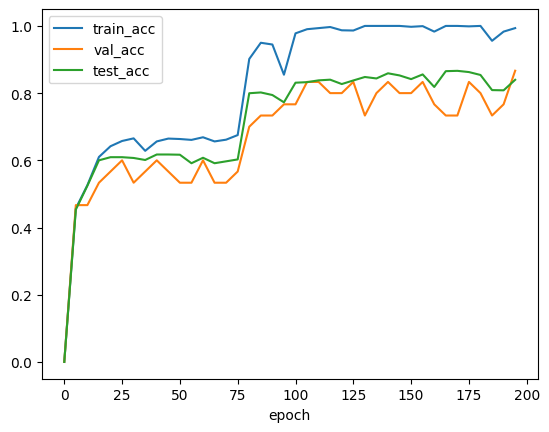

In [4]:
df.plot(x="epoch", y=["train_acc", "val_acc", "test_acc"]);

In [5]:
max(df["test_acc"])

0.8663333333333333

In [6]:
# calculate the per-class accuracy from the confusion matrix
def per_class_acc(conf_mat):
    return np.diag(conf_mat) / conf_mat.sum(axis=1)

In [7]:
def per_class_true_labels(conf_mat):
    return conf_mat.sum(axis=1)

In [10]:
# test_after = np.load(f"{size}_test_conf_after.npy")
# test_before = np.load(f"{size}_test_conf_before.npy")


test_before = np.load(f"before_test_conf_mat_0.npy")
# test_before = np.load(f"conf_mat_0_before_val.npy")
test_cls_0 = np.load(f"conf_mat_0_class_0.npy")
test_cls_2 = np.load(f"conf_mat_0_class_2.npy")
test_cls_3 = np.load(f"conf_mat_0_class_3.npy")
test_after = np.load(f"conf_mat_0_after_sharing.npy")


train_before = np.load(f"before_train_conf_mat_0.npy")
train_cls_0 = np.load(f"after_class_0_train_conf_mat_0.npy")
train_cls_2 = np.load(f"after_class_2_train_conf_mat_0.npy")
train_cls_3 = np.load(f"after_class_3_train_conf_mat_0.npy")
train_after = np.load(f"after_train_conf_mat_0.npy")


# train_after = np.load(f"{size}_train_conf_after.npy")
# train_before = np.load(f"{size}_train_conf_before.npy")

/tmp/ipykernel_411315/329616039.py:3: RuntimeWarning: invalid value encountered in divide
  return np.diag(conf_mat) / conf_mat.sum(axis=1)


array([0.843, 0.942,   nan,   nan,   nan,   nan,   nan,   nan, 0.814,
         nan])

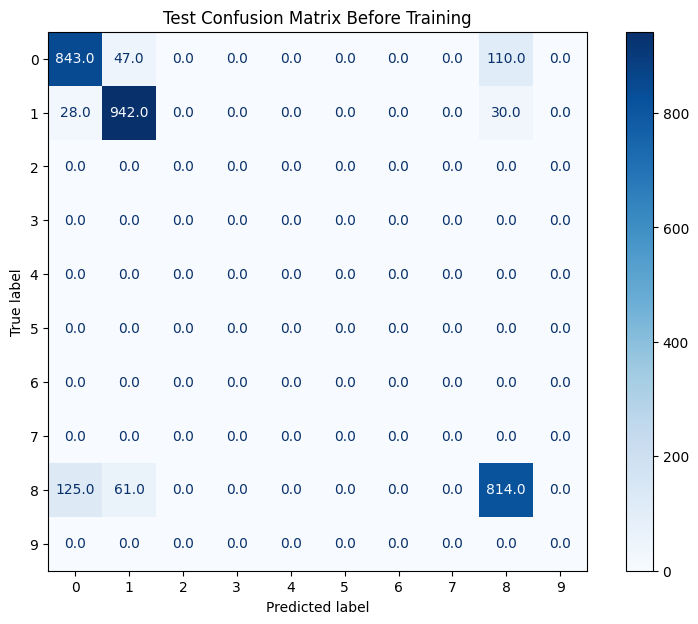

In [11]:
fig, ax = plt.subplots(figsize=(10, 7))
ConfusionMatrixDisplay(test_before).plot(cmap="Blues", values_format="", ax=ax);
plt.title("Test Confusion Matrix Before Training");
per_class_acc(test_before)

/tmp/ipykernel_411315/329616039.py:3: RuntimeWarning: invalid value encountered in divide
  return np.diag(conf_mat) / conf_mat.sum(axis=1)


array([ 1.,  1., nan, nan, nan, nan, nan, nan,  1., nan])

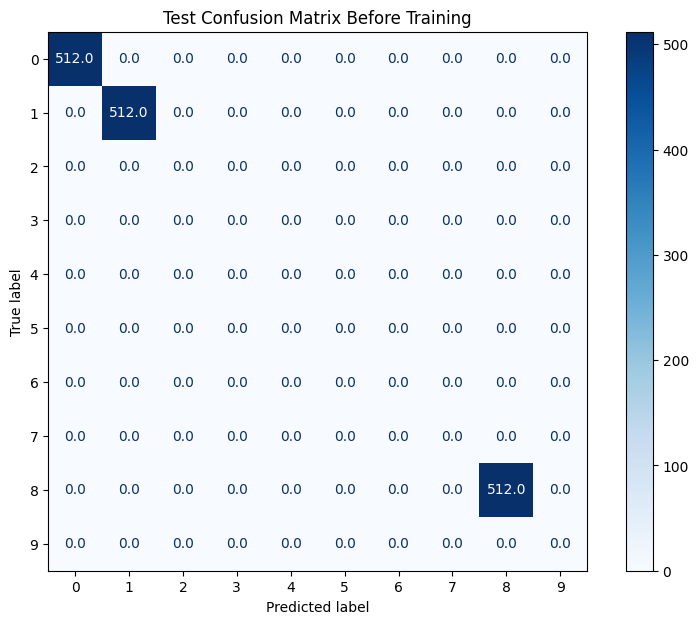

In [12]:
# TODO: this is wrong... The train loss is garbage...
# train loader is problematic... Why does it only have a few 8???
fig, ax = plt.subplots(figsize=(10, 7))
ConfusionMatrixDisplay(train_before).plot(cmap="Blues", values_format="", ax=ax);
plt.title("Test Confusion Matrix Before Training");
per_class_acc(train_before)

In [13]:
per_class_true_labels(train_before)

array([512., 512.,   0.,   0.,   0.,   0.,   0.,   0., 512.,   0.])

In [ ]:
# TODO: debug, somehow the network learns to always predict 0 and 1 and NOT 8 (WTFFF??? Dataloader is not shuffled. Like what the actual FUCK dude???)
(0.87 + 0.911 + 0.071)/3

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
ConfusionMatrixDisplay(test_after).plot(cmap="Blues", values_format='', ax=ax);
plt.title("Test Confusion Matrix After Training");
per_class_acc(test_after)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
ConfusionMatrixDisplay(test_cls_0).plot(cmap="Blues", values_format='', ax=ax);
plt.title("Test Confusion Matrix After Training");
per_class_acc(test_cls_0)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
ConfusionMatrixDisplay(test_cls_2).plot(cmap="Blues", values_format='', ax=ax);
plt.title("Test Confusion Matrix After Training");
per_class_acc(test_cls_2)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
ConfusionMatrixDisplay(test_cls_3).plot(cmap="Blues", values_format='', ax=ax);
plt.title("Test Confusion Matrix After Training");
per_class_acc(test_cls_3)